# Asia Network

This example explores the famous "Asia" network by Lauritzen and Spiegelhalter:
Lauritzen, S. L., & Spiegelhalter, D. J.  (1988).  Local computations withprobabilities on graphical structures and their application to expertsystems.Journal of the Royal Statistical Society:  Series B (Method-ological),50(2), 157–194.

This Bayesian Network is discussed in more detail in the course-book "Inference & Causality" in unit 1.2

The definition of the network can be obtained from http://www.bnlearn.com/bnrepository/asia/asia.bif.gz and we will use a local copy to avoid downloading it with each new start.

In [1]:
# get files if not yet there

#!wget http://www.bnlearn.com/bnrepository/asia/asia.bif.gz
#!gunzip asia.bif.gz
!ls

AsiaBayesNet.ipynb		     asia.bif
DoWhyFirstSteps.ipynb		     doWhy_CausalDo.ipynb
LinearRegressionProbabilistic.ipynb  doWhy_Confounder.ipynb
MCEquilibrium.ipynb		     requirements.txt


In [2]:
# imports
from pgmpy.readwrite import BIFReader
from pgmpy.inference import VariableElimination
import networkx as nx
import pylab as plt

/home/kerzel/VirtualEnvs/CausalityEnv/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
#load pre-defined model
reader = BIFReader('asia.bif')
model = reader.get_model()
model.check_model()

True

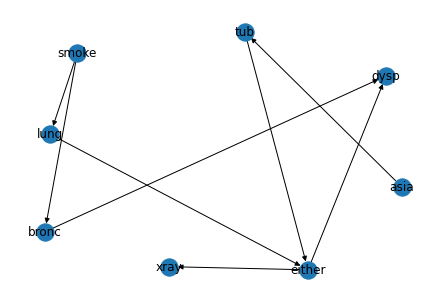

In [4]:
# visualize model
nx.draw(model, with_labels=True)
plt.show()

Now that the network is fully defined and checked, 
we can use it for inferences.

Exercise: use the network to infer different variables, using different observations as evidence.

In [5]:
# make some inferences
infer = VariableElimination(model)
posterior_p = infer.query(variables=['asia'], evidence={'smoke': 'yes', 'dysp':'yes'})
print(posterior_p)

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 265.29it/s]

Eliminating: lung: 100%|██████████| 5/5 [00:00<00:00, 249.11it/s]

+-----------+-------------+
| asia      |   phi(asia) |
+===========+=============+
| asia(yes) |      0.0102 |
+-----------+-------------+
| asia(no)  |      0.9898 |
+-----------+-------------+
